Profil1.tif
240.88589274669252 240
265.0593573530475 265
171
0


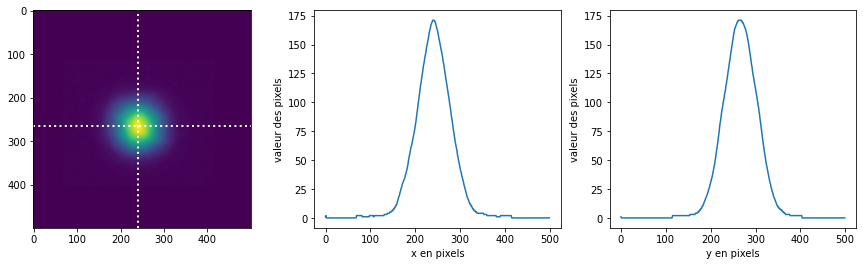

Profil2.tif
201.07399519409284 201
262.49937312860453 262
231
0


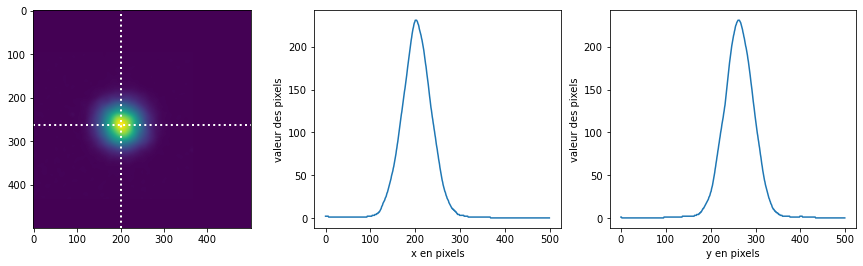

Profil3.tif
247.70217928319215 247
262.4391879171863 262
209
0


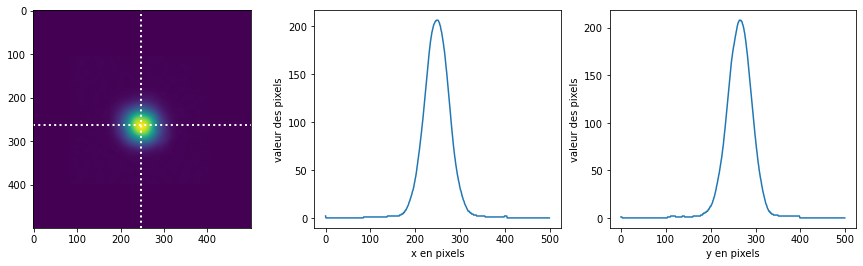

Profil4.tif
258.92898174004716 258
272.9883004321549 272
234
0


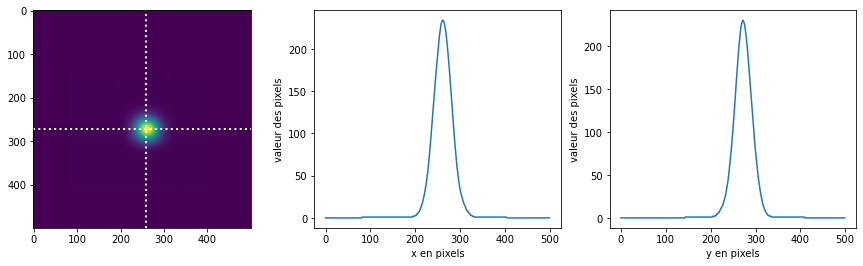

Profil5.tif
327.9227092428373 327
259.7027453735933 259
192
0


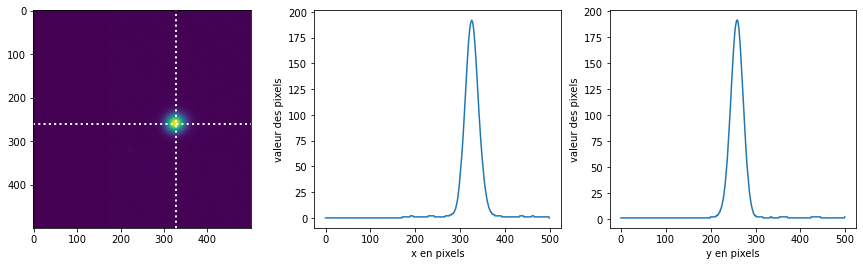

Profil6.tif
264.0560462356048 264
271.5378578073374 271
214
0


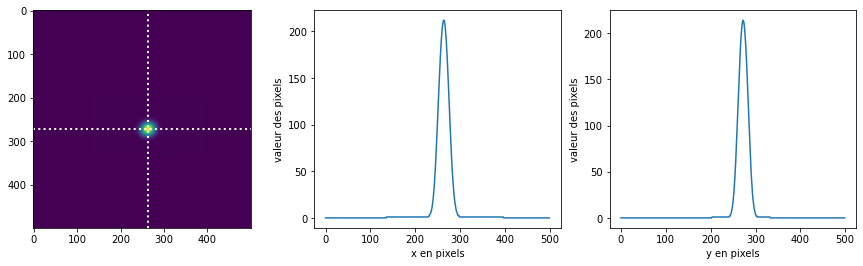

Profil7.tif
262.14030629249436 262
244.894505732569 244
200
0


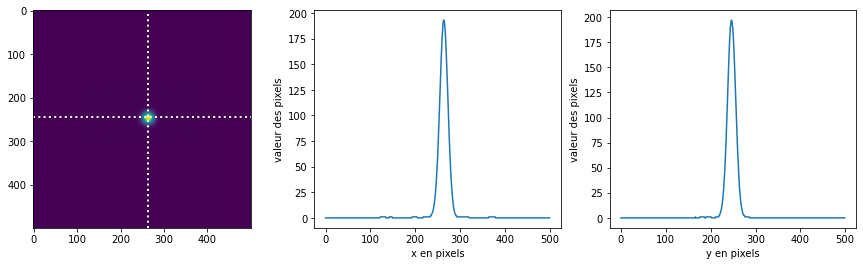

Profil8.tif
311.86968278413974 311
240.13413437835146 240
191
0


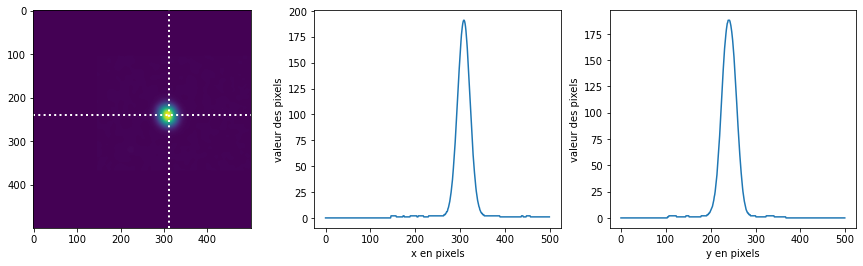

Profil9.tif
379.78495524415223 379
259.8695535137864 259
219
0


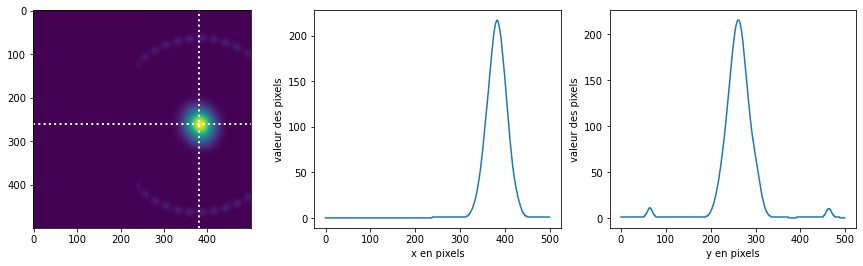

Profil10.tif
251.03619318263816 251
244.03110252981273 244
226
0


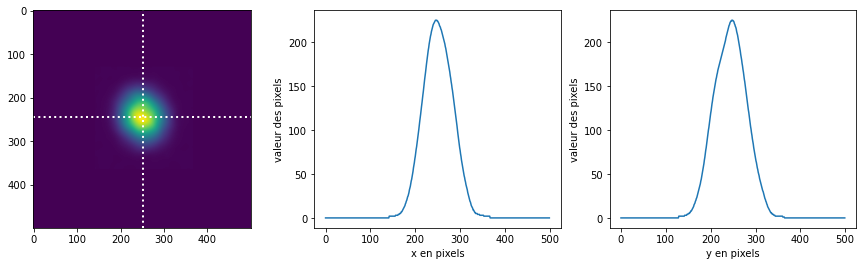

Profil11.tif
265.28099653840263 265
252.3730712719203 252
229
0


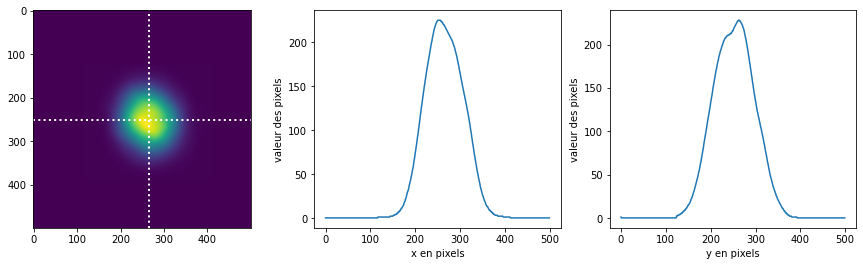

Profil12.tif
242.79280289357783 242
246.63688806696226 246
176
0


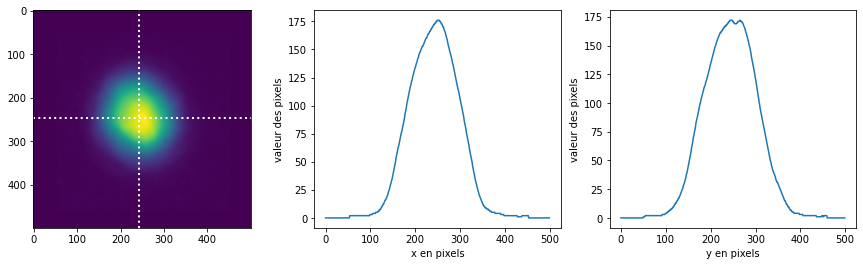

Profil13.tif
245.29943948995512 245
256.4974104166992 256
210
0


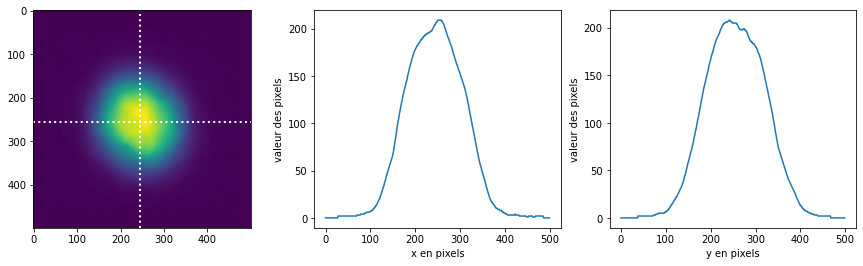

Profil14.tif
256.5571549871236 256
246.55487075963364 246
230
0


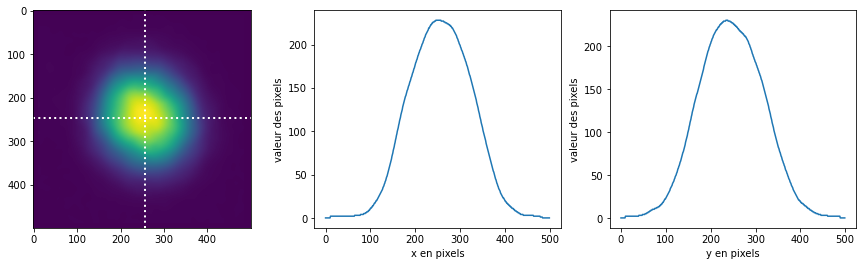

Profil15.tif
241.9520045771037 241
244.07581856882956 244
202
0


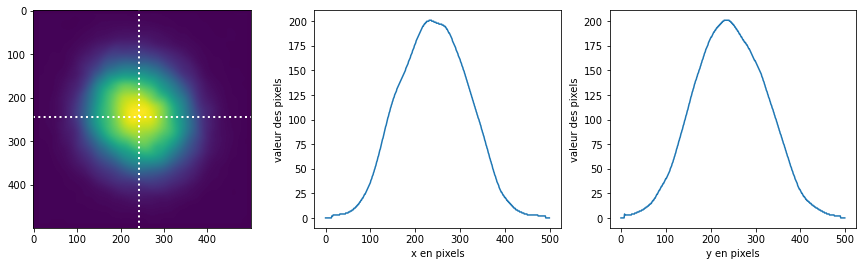

C:\Users\Sylvie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


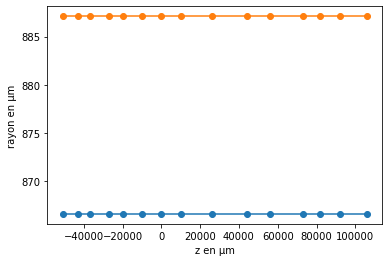

la taille du waist en x est  866.6340935437004
la taille du waist en y est  887.103540493
le M2 en x est  0.0013850110710123156
le M2 en y est  0.001009106108619096


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

pix = 5.2
x = np.linspace(0,499,500)
y = np.linspace(0,499,500)

xx, yy = np.meshgrid(x,y)

nb_image = 15
wx = np.zeros(nb_image)
wy = np.zeros(nb_image)
z = 1000*np.array([-51., -43., -37., -27., -20., -10., 0., 10., 26., 44., 56., 73., 82., 92., 106.])#distance z du plan du waist en mm

def gauss(x,w,A,B,x0):
    f = A+B*np.exp(-2*(x-x0)**2/w**2)
    return f

#on prend une longueur d'onde de 1 µm

def rayon(z,w0,zR):
    rayon = w0*np.sqrt(1+(z/zR)**2)
    return rayon


for i in range(nb_image):
    nom = f'Profil{i+1}.tif'
    print(nom)
    image=plt.imread(nom)
#calcul des coordonnées du barycentre en pixels 
    xbary = np.sum(np.sum(xx*image))/np.sum(np.sum(image))
    ybary = np.sum(np.sum(yy*image))/np.sum(np.sum(image))
    valmax = image.max()
    valmin = image.min()
    print(xbary,int(xbary))
    print(ybary,int(ybary))
    print(valmax)
    print(valmin)
  
     
    plt.figure(figsize = (15,4))
    plt.subplot(131)
    plt.imshow(image)
    plt.axvline(x=xbary,color='white',linestyle='dotted',linewidth=2)
    plt.axhline(y=ybary,color='white',linestyle='dotted',linewidth=2)
    
    pox = [100,valmin,valmax,xbary]
    poy = [100,valmin, valmax,ybary]
    
    #poptx,pcovx = curve_fit(gauss,x,image[int(np.floor(ybary)),:],pox)#on fixe la ligne ybary
    
    plt.subplot(132)
    #plt.plot(x,gauss(x,poptx[0],poptx[1],poptx[2],poptx[3]))
    plt.plot(x,image[int(np.floor(ybary)),:])
    plt.xlabel("x en pixels")
    plt.ylabel("valeur des pixels")
    
    #popty,pcovy = curve_fit(gauss,x,image[:,int(np.floor(xbary))],poy)#on fixe la ligne ybary
    
    plt.subplot(133)
    #plt.plot(x,gauss(x,popty[0],popty[1],popty[2],popty[3]))
    plt.plot(x,image[:,int(np.floor(xbary))])
    plt.xlabel("y en pixels")
    plt.ylabel("valeur des pixels")
    
    plt.show()
    
#Calcul des rayons des faisceaux en µm
    
    wx[i] = pix*np.abs(poptx[0])
    wy[i] = pix*np.abs(popty[0])
    
poptrx,pcovrx = curve_fit(rayon,z,wx)
poptry,pcovry = curve_fit(rayon,z,wy)
plt.plot(z,rayon(z,poptrx[0],poptrx[1]))
plt.plot(z,rayon(z,poptry[0],poptry[1]))
plt.scatter(z,wx)
plt.scatter(z,wy)
plt.xlabel("z en µm")
plt.ylabel("rayon en µm")
plt.show()

print("la taille du waist en x est ",poptrx[0])
print("la taille du waist en y est ",poptry[0])
print("le M2 en x est ", np.pi*poptrx[0]**2/(1.3*poptrx[1]))
print("le M2 en y est ", np.pi*poptry[0]**2/(1.3*poptry[1]))
    
    

    



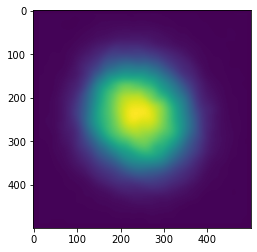

In [137]:
image_test=plt.imread('Profil1.tif')
plt.imshow(image)

In [72]:
print(np.pi)




3.141592653589793


In [ ]:
imagecp=np.copy(image)
image_ok=imagecp[100:600,100:600]


#valmin_ok=image_ok.min()#donne les valeurs min de l'image, ici 0 -> c'est un nombre
#print(valmin_ok)
valmax_ok=image_ok.max()
print(valmax_ok)

#indmin_ok=np.where(image_ok==valmin_ok)#donne les indices de tous les min de l'image - indmin est un tuple qui contient 2 tableaux
indmax_ok=np.where(image_ok==valmax_ok)
#print(indmin_ok)
#print(indmax_ok)
#ligne_max=indmax_ok[0][0]
#colonne_max=indmax_ok[1][0]

ligne_mean=int(np.floor(np.mean((indmax_ok[0]))))
colonne_mean=int(np.floor(np.mean((indmax_ok[1]))))

plt.imshow(image_ok)
plt.axvline(x=colonne_mean,color='white',linestyle='dotted',linewidth=2)
plt.axhline(y=ligne_mean,color='white',linestyle='dotted',linewidth=2)
plt.show()



In [ ]:
#Tracé des coupes
#plt.figure(figsize=(11,4))
#plt.subplot(121)
#plt.plot(image_ok[:,colonne_mean])
#plt.subplot(122)
#plt.plot(image_ok[ligne_mean,:])
#plt.show()

#Taille du pixel en x et y : 4,65 microns - il y a 500 points par ligne et colonne
pix = 4.65
x = pix*np.linspace(0,499,500)
y = pix*np.linspace(0,499,500)
#plt.figure(figsize=(11,4))
#plt.subplot(121)
#plt.plot(x,image_ok[:,colonne_mean])
#plt.title("coupe en x")
#plt.xlabel("x en $\mu$m")
#plt.subplot(122)
#plt.plot(y,image_ok[ligne_mean,:])
#plt.title("coupe en y")
#plt.xlabel("y en $\mu$m")
#plt.show()

from scipy.optimize import curve_fit
import random

def gauss(x,w,A,B,x0):
    f = A+B*np.exp(-2*(x-x0)**2/w**2)
    return f
p0x = [500,1,175,1000]

poptx,pcovx = curve_fit(gauss,x,image_ok[:,colonne_mean],p0x)

plt.plot(x,gauss(x,poptx[0],poptx[1],poptx[2],poptx[3]))
plt.plot(x,image_ok[:,colonne_mean])

print(poptx[0],poptx[1],poptx[2],poptx[3])
plt.figure()

p0y = [500,1,160,1000]

popty,pcovy = curve_fit(gauss,x,image_ok[ligne_mean,:],p0y)

plt.plot(x,gauss(x,popty[0],popty[1],popty[2],popty[3]))
plt.plot(x,image_ok[ligne_mean,:])

print(popty[0],popty[1],popty[2],popty[3])

plt.show()

In [ ]:
for i in range(2):
    nom = f'test{i+1}.tif'
    print(nom)
    image_boucle=plt.imread(nom)
    plt.imshow(image_boucle)
    plt.figure()

In [ ]:
from scipy.optimize import curve_fit
import random

def gauss(x,w,A,B,x0):
    f = A+B*np.exp(-2*(x-x0)**2/w**2)
    return f

x = np.linspace(-1,1,500)
plt.plot(x,gauss(x,0.2,5,1,0))
random.seed(2)
bruit = np.array([random.uniform(0,0.05) for i in range(500)])
gauss_bruit = gauss(x,0.2,5,1,0)+bruit

plt.plot(x,gauss_bruit)
plt.figure()
popt,pcov = curve_fit(gauss,x,gauss_bruit)
plt.plot(x,gauss(x,popt[0],popt[1],popt[2],popt[3]))
print(popt[0],popt[1],popt[2],popt[3])
print(popt[0]-0.2,popt[1]-5,popt[2]-1,popt[3]-0)
print(pcov)


In [ ]:
332.75481111804453 1.0718114545633781 170.74971535297632 1089.4689264061262
332.75481191198395 1.071811155021232 170.7497155732944 1089.468926404988